In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


In [77]:
dataset = pd.read_csv('db/acoes1.csv')
data_kepp = pd.DataFrame()

pesos = [ 0       , 0.14606081, 0.07066455, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.19750672,
        0.        , 0.16134091, 0.07168594, 0.        , 0.        ,
        0.        , 0.        , 0.23545873, 0.        , 0.11728234,
        0.        , 0.        ]

dinheiro = 5000
data_kepp["Date"] = dataset["Date"] 
data_kepp["BOVA11.SA"] = dataset["BOVA11.SA"]


dataset.drop("Date", inplace= True, axis= 1)
dataset.drop("BOVA11.SA", inplace= True, axis= 1)

for i in dataset.columns:
            dataset[i] = (dataset[i] / dataset[i][0])

for i, acao in enumerate(dataset.columns):
            dataset[acao] = dataset[acao] * pesos[i] * dinheiro

dataset['soma carteira'] = dataset[1:].sum(axis = 1)

dataset["Date"] = data_kepp["Date"]
dataset["BOVA11.SA"] = data_kepp["BOVA11.SA"]

dataset = dataset[['Date', 'soma carteira']].rename(columns = {'Date': 'ds', 'soma carteira': 'y'})
modelo = Prophet()
modelo.fit(dataset)
futuro = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(futuro)
plot_plotly(modelo, previsoes)


09:29:51 - cmdstanpy - INFO - Chain [1] start processing
09:29:51 - cmdstanpy - INFO - Chain [1] done processing
/home/ikaro/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [66]:
dataset = pd.read_csv('db/acoes1.csv', usecols=['Date', 'BOVA11.SA'])
dataset = dataset[['Date', 'BOVA11.SA']].rename(columns = {'Date': 'ds', 'BOVA11.SA': 'y'})
dataset

,ds,y
0,2012-03-01,65.739998
1,2012-03-02,66.750000
2,2012-03-05,65.949997
3,2012-03-06,64.019997
4,2012-03-07,65.110001
...,...,...
2890,2023-10-19,110.599998
2891,2023-10-20,109.500000
2892,2023-10-23,109.349998
2893,2023-10-24,110.239998


In [67]:
modelo = Prophet()
modelo.fit(dataset)

09:23:05 - cmdstanpy - INFO - Chain [1] start processing
09:23:06 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
futuro = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(futuro)

In [69]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-03-01,61.893270,54.144588,69.575650,61.893270,61.893270,-0.411308,-0.411308,-0.411308,-0.648996,-0.648996,-0.648996,0.237688,0.237688,0.237688,0.0,0.0,0.0,61.481962
1,2012-03-02,61.874098,54.182347,67.953744,61.874098,61.874098,-0.491878,-0.491878,-0.491878,-0.559972,-0.559972,-0.559972,0.068093,0.068093,0.068093,0.0,0.0,0.0,61.382220
2,2012-03-05,61.816583,53.082288,68.096179,61.816583,61.816583,-1.051985,-1.051985,-1.051985,-0.593960,-0.593960,-0.593960,-0.458025,-0.458025,-0.458025,0.0,0.0,0.0,60.764598
3,2012-03-06,61.797411,53.263811,67.068900,61.797411,61.797411,-1.249939,-1.249939,-1.249939,-0.616123,-0.616123,-0.616123,-0.633816,-0.633816,-0.633816,0.0,0.0,0.0,60.547472
4,2012-03-07,61.778240,53.223523,67.308497,61.778240,61.778240,-1.432179,-1.432179,-1.432179,-0.625165,-0.625165,-0.625165,-0.807014,-0.807014,-0.807014,0.0,0.0,0.0,60.346061


In [70]:
len(dataset), len(previsoes)
len(previsoes) - len(dataset)

63

/home/ikaro/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/ikaro/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



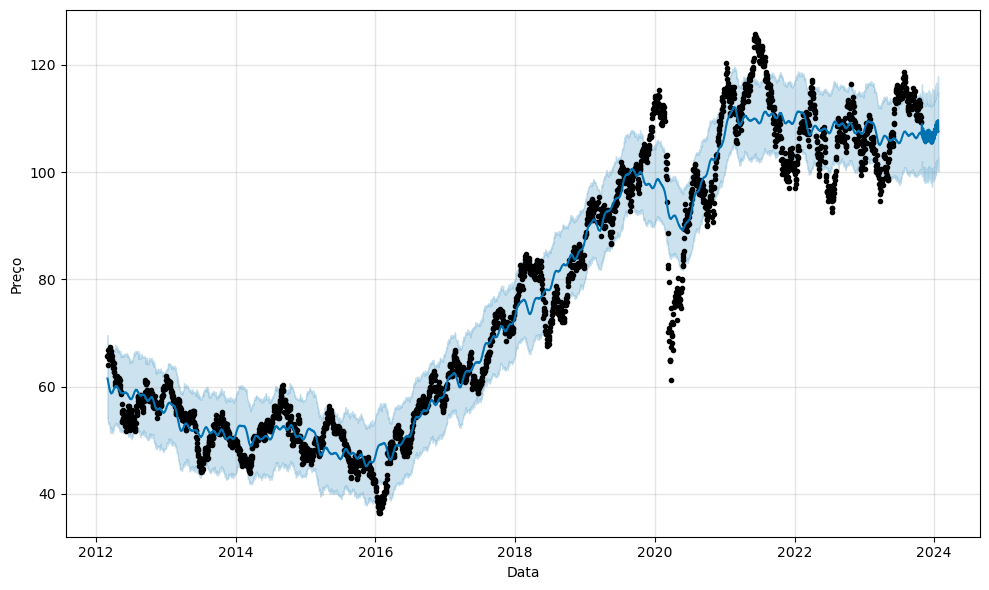

In [71]:
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

/home/ikaro/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/ikaro/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/ikaro/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



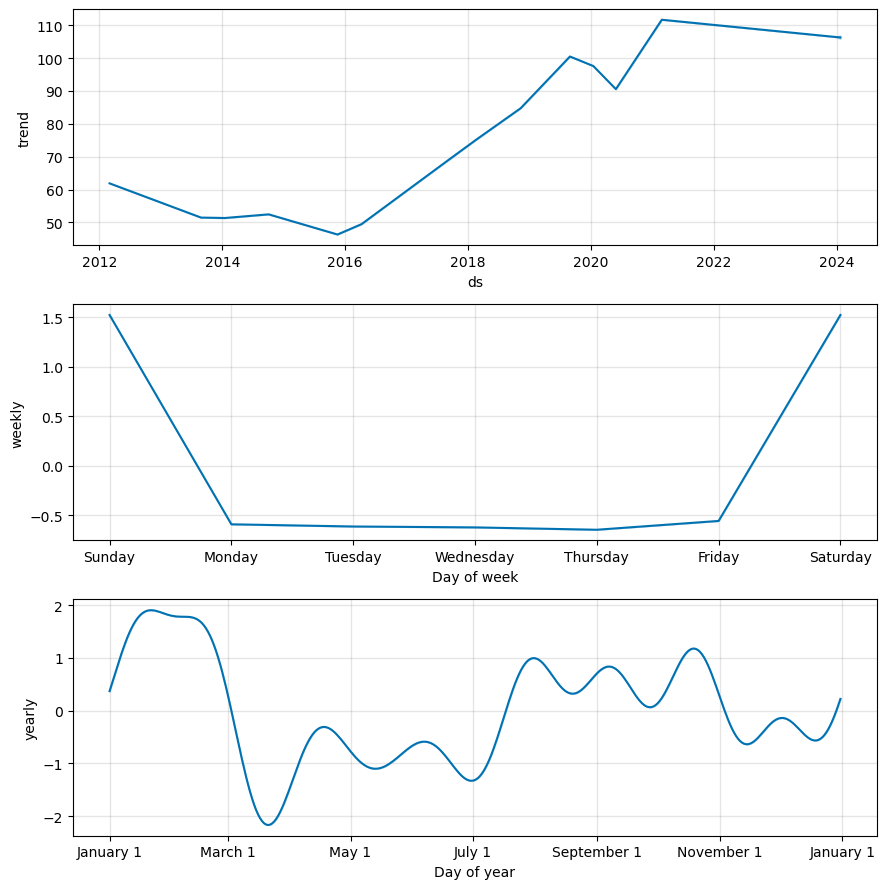

In [72]:
modelo.plot_components(previsoes);

In [73]:
plot_plotly(modelo, previsoes)

/home/ikaro/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

